In [33]:
import sys
import json
import pathlib
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import numpy as np
import random

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "white",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white",
    "font.size": 25})

In [34]:
def get_data(file):
    f = open(file,)
    jsonData = json.load(f)
    f.close()
    return float(jsonData['Success']['Mean']) * 100
    # print(data)

def add_new_data(directory, unbalanced_channels, successRate):
    for file in pathlib.Path(directory).glob('*'):
        if str(file).split('/')[-1] == "cloth_output.json":
            unbalanced_channels.append(int(str(file).split('/')[1]) / 304.57)
            successRate.append(get_data(file))
            # get_data(file)

def add_new_data_batch(directory, _from, successRate):
    for file in pathlib.Path(directory).glob('*'):
        if str(file).split('/')[-1] == "cloth_output.json":
            _from.append(int(str(file).split('/')[1]))
            successRate.append(get_data(file))
            # get_data(file)

In [35]:
output_dir = "networks"
unbalanced_channels = []
successRate = []
for directory in pathlib.Path(output_dir).glob('*'):
    # if int(str(directory).split("/")[-1]) % 1500 == 0:
    add_new_data(str(directory), unbalanced_channels, successRate)
print(unbalanced_channels)
print(successRate)

[100.0, 88.64957152707096, 34.4748333716387, 29.549857175690317, 59.099714351380634, 98.49952391896772, 19.699904783793546, 73.8746429392258, 4.924976195948386, 24.62488097974193, 64.02469054732903, 14.774928587845158, 39.39980956758709, 83.72459533112257, 68.9496667432774, 93.57454772301934, 49.24976195948386, 9.849952391896773, 78.79961913517418, 44.32478576353548, 54.17473815543225]
[18.534228159999998, 56.75757863999999, 85.00919131, 87.68729668, 74.10254277, 35.861275129999996, 90.61193752, 67.24435118, 97.02755433, 89.18123608, 72.9490791, 93.24976199, 83.1112918, 61.62302429, 70.71252219, 51.53260048, 78.80306037, 94.56137106, 64.62031147, 81.76023223, 77.39476466]


In [36]:
output_dir = "EBC_networks"
EBC_unbalanced_channels = []
EBC_successRate = []
for directory in pathlib.Path(output_dir).glob('*'):
    if int(str(directory).split("/")[-1]) % 1500 == 0:
        add_new_data(str(directory), EBC_unbalanced_channels, EBC_successRate)
print(EBC_unbalanced_channels)
print(EBC_successRate)

[88.64957152707096, 34.4748333716387, 29.549857175690317, 59.099714351380634, 19.699904783793546, 73.8746429392258, 4.924976195948386, 24.62488097974193, 64.02469054732903, 14.774928587845158, 39.39980956758709, 83.72459533112257, 68.9496667432774, 49.24976195948386, 9.849952391896773, 78.79961913517418, 44.32478576353548, 54.17473815543225]
[21.21841126, 76.7257519, 79.31614538000001, 64.47036510000001, 85.23297863, 57.85413532, 93.19174878000001, 82.90822342, 61.677813130000004, 85.96686968, 74.21022549, 51.65989555, 60.24609065999999, 68.9938547, 90.71372595, 55.955510659999995, 69.83435283, 67.61005184999999]


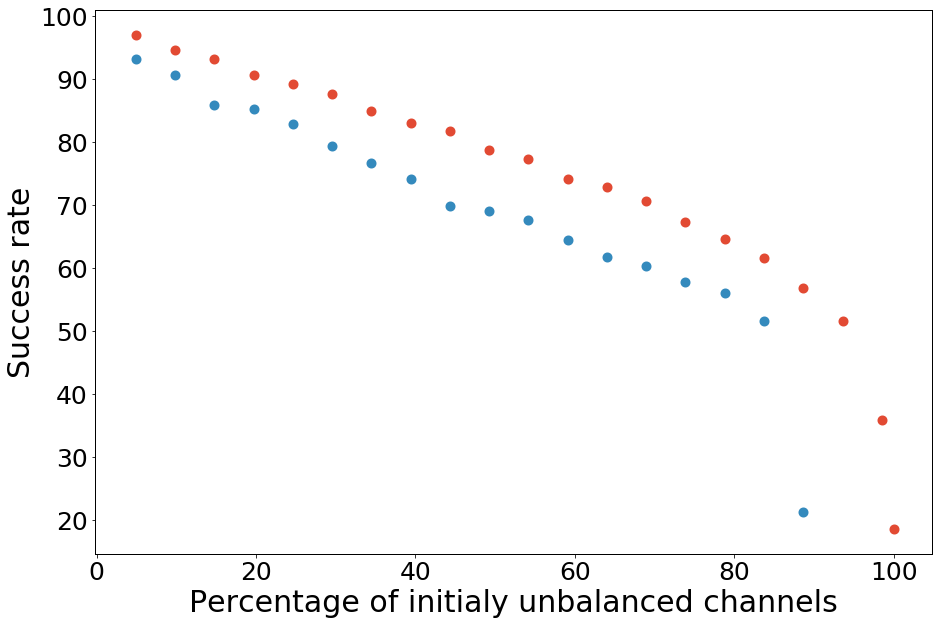

In [37]:
plt.scatter(unbalanced_channels, successRate, linewidth=4)
plt.scatter(EBC_unbalanced_channels, EBC_successRate, linewidth=4)

plt.xlabel("Percentage of initialy unbalanced channels")
plt.ylabel("Success rate")
plt.show()

[27000, 10500, 9000, 18000, 6000, 22500, 1500, 7500, 19500, 4500, 12000, 25500, 21000, 28500, 15000, 3000, 24000, 13500, 16500, 0]
[98.61489031, 92.60437483, 90.33638309999999, 96.72022822000001, 91.35824547, 97.09624601, 91.26036904, 91.08596478, 98.40815342, 93.17406769, 93.80848627, 97.36141353, 98.30556080000001, 98.96841636, 93.53335838, 91.90000733, 97.09557932, 95.22315996, 94.06035697, 85.96686968]


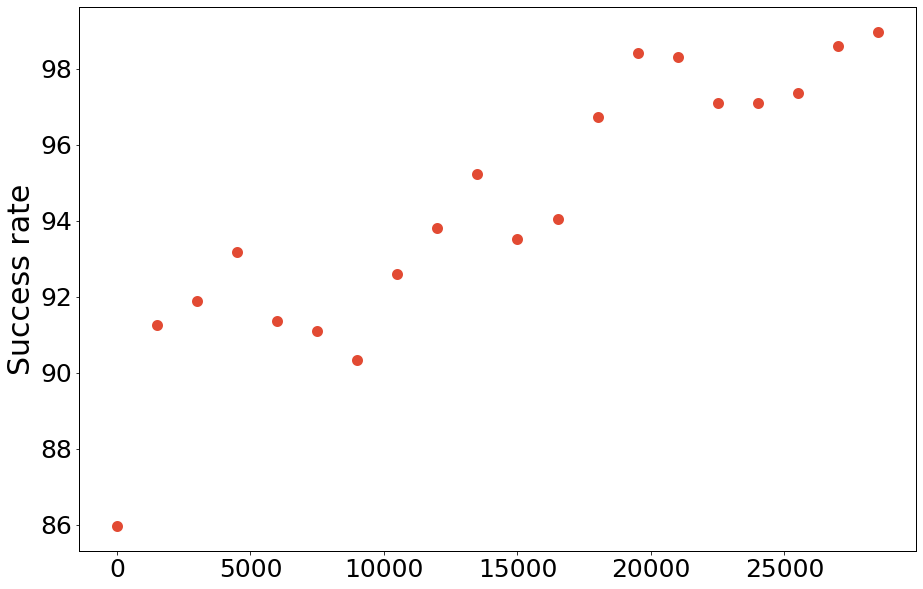

In [50]:
output_dir = "batch_EBC_networks"
EBC_from = []
batch_EBC_successRate = []
for directory in pathlib.Path(output_dir).glob('*'):
    if int(str(directory).split("/")[-1]) % 1500 == 0:
        add_new_data_batch(str(directory), EBC_from, batch_EBC_successRate)
print(EBC_from)
print(batch_EBC_successRate)
plt.scatter(EBC_from, batch_EBC_successRate, linewidth=5)
# plt.plot(EBC_from, batch_EBC_successRate, linewidth=4)

# plt.xlabel("Percentage of initialy unbalanced channels")
plt.ylabel("Success rate")
plt.show()